Proyecto Deep Learning Spotify

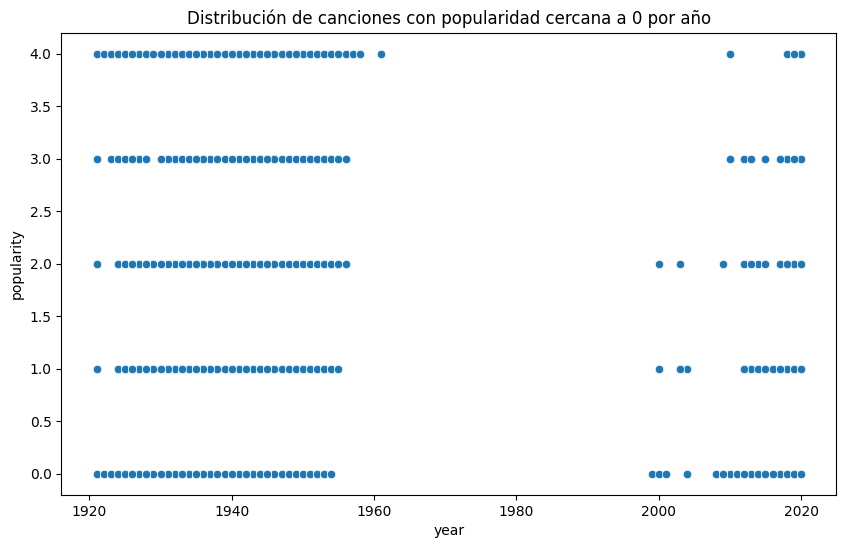

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r'..\data\data.csv')

# Mostramos la distribución de canciones con popularidad cercana a 0 por año
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['popularity'] < 5], x='year', y='popularity')
plt.title("Distribución de canciones con popularidad cercana a 0 por año")
plt.show()

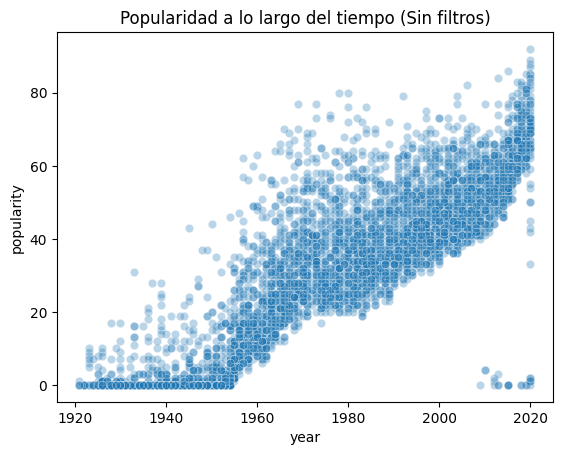

In [2]:
# Gráfico de TODOS los datos (una muestra aleatoria para no saturar)
sns.scatterplot(data=df.sample(5000), x='year', y='popularity', alpha=0.3)
plt.title("Popularidad a lo largo del tiempo (Sin filtros)")
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que df es vuestro dataset completo cargado

# 1. ANÁLISIS DE "BASURA"
# Vamos a ver qué pinta tienen esas muestras sospechosas
muestras_cortas = df[df['duration_ms'] < 60000] # Menos de 1 min
muestras_habladas = df[df['speechiness'] > 0.9] # Casi todo voz
muestras_sin_tempo = df[df['tempo'] == 0]       # Error técnico

print(f"Canciones de menos de 1 minuto: {len(muestras_cortas)}")
print(f"Tracks que son solo voz (audiolibros/charlas): {len(muestras_habladas)}")
print(f"Tracks con tempo 0: {len(muestras_sin_tempo)}")

# 2. APLICACIÓN DE LA LIMPIEZA
# Definimos las condiciones de "Basura"
condicion_basura = (
    (df['duration_ms'] < 40000) |       # Menos de 40 seg (Intros/Ruido)
    (df['speechiness'] > 0.9) |         # Pura voz (No música)
    (df['tempo'] == 0)                  # Error de datos
)

# Nos quedamos con lo que NO es basura
# El símbolo ~ invierte la condición (significa "NO es basura")
df_limpio_final = df[~condicion_basura].copy()

print(f"\nDimensiones antes de limpiar basura: {df.shape}")
print(f"Dimensiones después de limpiar basura: {df_limpio_final.shape}")
print(f"Hemos eliminado {df.shape[0] - df_limpio_final.shape[0]} muestras de 'ruido'.")

# 3. VERIFICACIÓN
# Comprobamos que seguimos teniendo los ceros "buenos" (los antiguos)
ceros_antiguos = df_limpio_final[(df_limpio_final['year'] < 1950) & (df_limpio_final['popularity'] == 0)]
print(f"\nTodavía conservamos {len(ceros_antiguos)} canciones antiguas con popularidad 0.")

Canciones de menos de 1 minuto: 1615
Tracks que son solo voz (audiolibros/charlas): 4016
Tracks con tempo 0: 143

Dimensiones antes de limpiar basura: (170653, 19)
Dimensiones después de limpiar basura: (165988, 19)
Hemos eliminado 4665 muestras de 'ruido'.

Todavía conservamos 19073 canciones antiguas con popularidad 0.


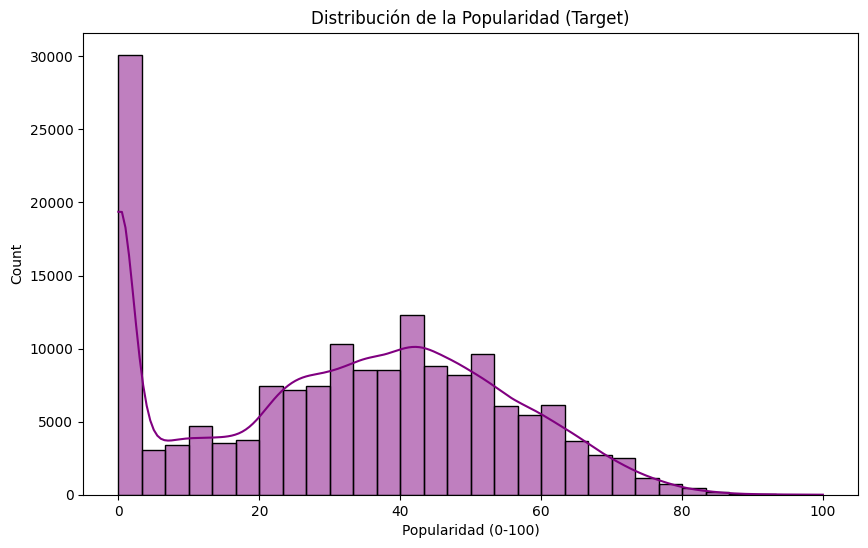

count    165988.000000
mean         32.188447
std          21.563531
min           0.000000
25%          14.000000
50%          34.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_limpio_final['popularity'], kde=True, bins=30, color='purple')
plt.title('Distribución de la Popularidad (Target)')
plt.xlabel('Popularidad (0-100)')
plt.show()

# Estadísticos básicos
print(df_limpio_final['popularity'].describe())

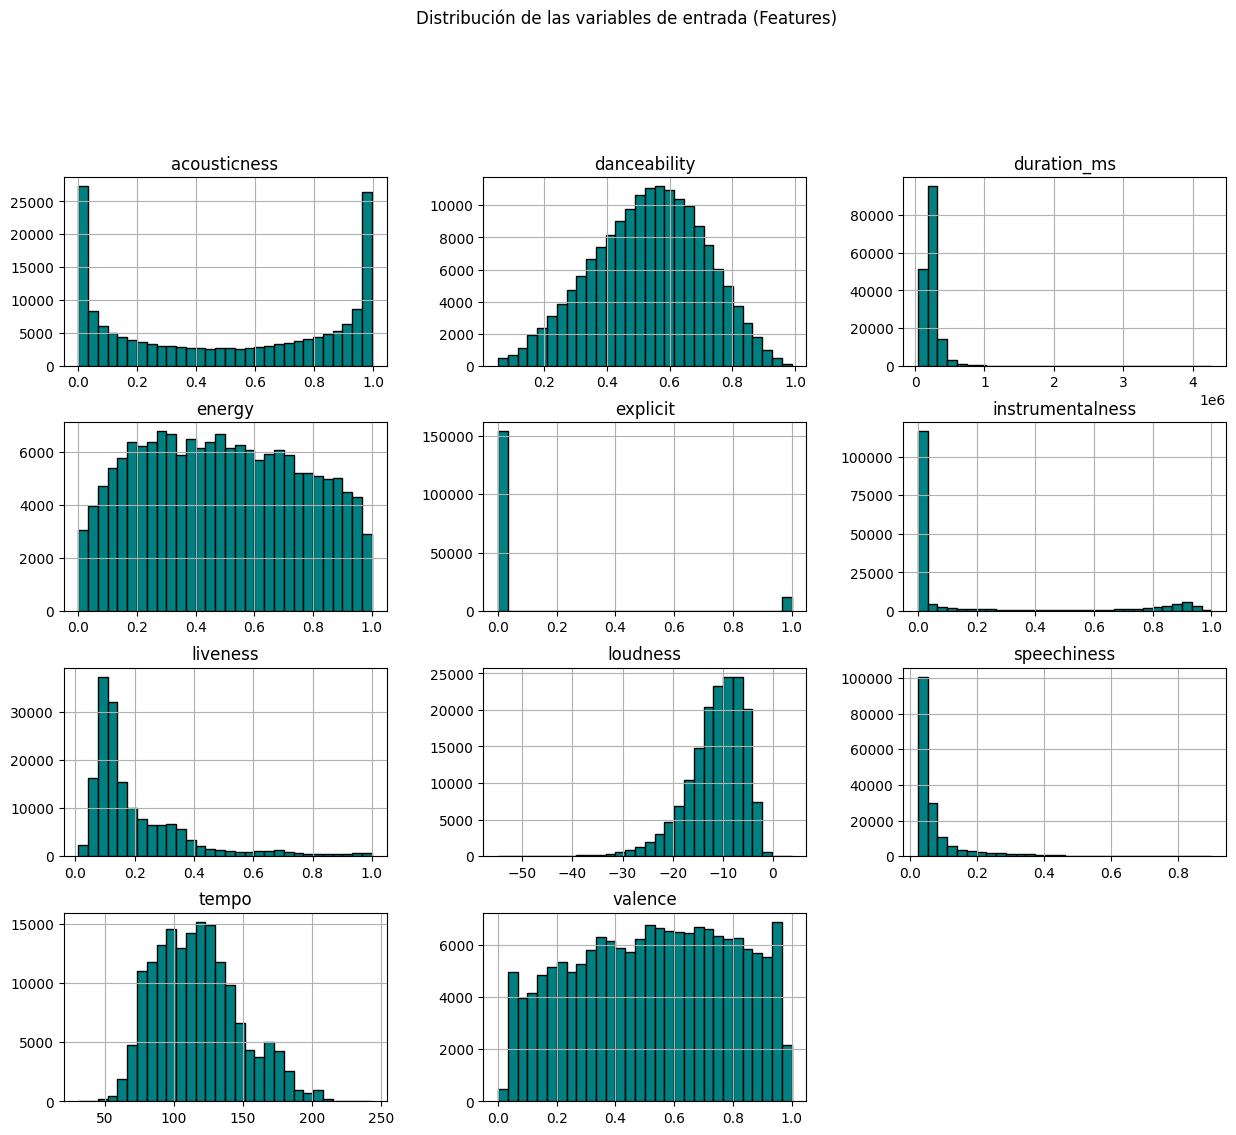

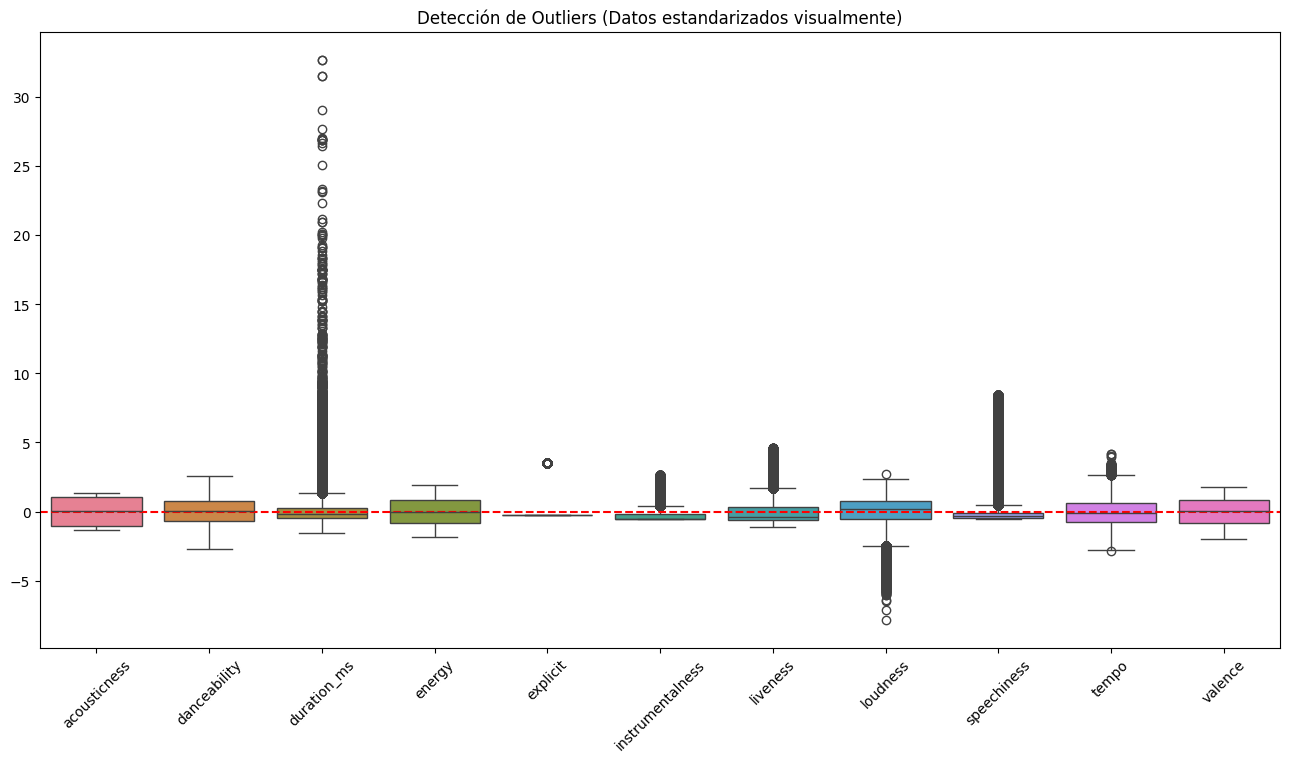

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos las columnas numéricas que usaremos para predecir
# Quitamos 'popularity' (es la Y) y 'year' (ya sabemos que está bien)
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
            'explicit', 'instrumentalness', 'liveness', 'loudness',
            'speechiness', 'tempo', 'valence']

# 1. HISTOGRAMAS (¿Cómo se distribuyen los datos?)
df_limpio_final[features].hist(figsize=(15, 12), bins=30, color='teal', edgecolor='black')
plt.suptitle('Distribución de las variables de entrada (Features)', y=1.02)
plt.show()

# 2. BOXPLOTS (Para ver Outliers y Escalas)
plt.figure(figsize=(16, 8))
# Usamos escala logarítmica para duration_ms porque es GIGANTE comparado con el resto
# O mejor: Estandarizamos visualmente solo para el gráfico para poder compararlas
df_norm_visual = (df_limpio_final[features] - df_limpio_final[features].mean()) / df_limpio_final[features].std()

sns.boxplot(data=df_norm_visual)
plt.xticks(rotation=45)
plt.title('Detección de Outliers (Datos estandarizados visualmente)')
plt.axhline(y=0, color='r', linestyle='--') # Línea de la media
plt.show()